In [46]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [47]:
df_original = pd.read_csv('./arquivos/Placement_Data_Full_Class.csv')
df_no_salary = df_original.drop('salary', axis=1).copy()

In [48]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [49]:
df_original.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [50]:
le = LabelEncoder()

In [51]:
df = df_no_salary
df['gender'] = le.fit_transform(df['gender'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['hsc_s'] = le.fit_transform(df['hsc_s'])
df['degree_t'] = le.fit_transform(df['degree_t'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])
df['status'] = le.fit_transform(df['status'])

dados = df
alvo = df['status']

In [52]:
dados_treino, dados_teste, alvo_treino, alvo_teste = train_test_split(dados, alvo, test_size=0.3, random_state=42)

In [53]:
# modelo = MultinomialNB()
modelo = LogisticRegression(solver='liblinear', max_iter=1000)
modelo.fit(dados_treino, alvo_treino)
alvo_pred = modelo.predict(dados_teste)

In [54]:
conf = confusion_matrix(alvo_teste, alvo_pred)
print("Matriz de confusão Regressão Logística:\n", conf)

Matriz de confusão Regressão Logística:
 [[18  3]
 [ 1 43]]


In [55]:
print("Acurácia Regressão Logística:", accuracy_score(alvo_teste, alvo_pred))

print("Precisão Regressão Logística:", precision_score(alvo_teste, alvo_pred, average='weighted'))

print("Revocação Regressão Logística:", recall_score(alvo_teste, alvo_pred, average='weighted'))

print("Medida F1 Regressão Logística:", f1_score(alvo_teste, alvo_pred, average='weighted'))

Acurácia Regressão Logística: 0.9384615384615385
Precisão Regressão Logística: 0.9388487942263687
Revocação Regressão Logística: 0.9384615384615385
Medida F1 Regressão Logística: 0.9376068376068378


### Comentários
```
Sobre a resultado da nota de precisão: significa que a acertabilidade dos verdadeiros positivos (pessoas que ele preveu como recolocada e que de fato foram recolocadas), é de 93.884%.
Sobre o resultado da nota de revocação: significa que o algoritmo preve que da quantidade total (100%) de verdadeiros positivos, ele preveu corretamente 93.846% deles, e o restante ele errou colocando como falso negativo.
```

In [56]:
print('Logistic Regression Classification Report:')
print(classification_report(alvo_teste, alvo_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.93      0.98      0.96        44

    accuracy                           0.94        65
   macro avg       0.94      0.92      0.93        65
weighted avg       0.94      0.94      0.94        65



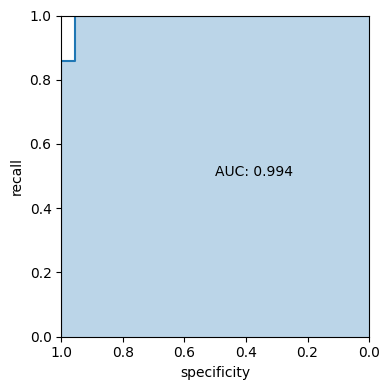

In [57]:
fpr, tpr, thresholds = roc_curve(alvo_teste, modelo.predict_proba(dados_teste)[:, 0], pos_label=0)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.text(0.5, 0.5, f'AUC: {np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)):.3f}')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

### SIM


In [58]:
df_no_status = df_original.copy()
df_no_status.drop('status', axis=1, inplace=True)

In [59]:
df = df_no_status
df['gender'] = le.fit_transform(df['gender'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['hsc_s'] = le.fit_transform(df['hsc_s'])
df['degree_t'] = le.fit_transform(df['degree_t'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])

df = df[np.isnan(df['salary']) == False]

dados = df
alvo = df['salary']

In [63]:
dados_treino, dados_teste, alvo_treino, alvo_teste = train_test_split(dados, alvo, test_size=0.3, random_state=42)

In [64]:
modelo = LinearRegression()
modelo.fit(dados_treino, alvo_treino)
alvo_pred = modelo.predict(dados_teste)

In [70]:
print(f'Intercept: {modelo.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(alvo_pred, modelo.coef_):
    print(f' {name}: {coef}')


Intercept: 0.000
Coefficients:
 350000.0: -4.997485031582477e-15
 335999.99999999994: -7.293032844302161e-11
 260000.0: -1.2452636578147436e-13
 349999.99999999994: -7.48206038903807e-12
 399999.9999999999: -1.0591014827296408e-12
 264999.99999999994: 4.461347063262552e-12
 250000.0: -9.483408708314815e-12
 249999.99999999997: -5.391845281886576e-13
 239999.99999999997: 6.852603977558188e-12
 200000.00000000003: -5.656271132893631e-12
 410999.9999999999: 4.1653380506052884e-13
 250000.00000000003: 1.2315064327802897e-11
 399999.9999999999: -6.394114025146808e-13
 300000.0: 0.9999999999999998


In [ ]:
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
mae = mean_absolute_error(house[outcome], fitted)
rse = RSE(house[outcome], fitted)
print(f'RMSE: {RMSE:.2f}')
print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RSE: {rse:.4f}')
